# Fraud classification

In [177]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,KFold,cross_validate,train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier  
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

from sklearn.externals import joblib  
import plotly.graph_objs as go#visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
init_notebook_mode(connected=True)

import eli5
from IPython.display import Image

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [212]:
df = pd.read_csv('20170504_test_download.csv', sep='\t',error_bad_lines=False)
pd.options.display.max_columns = 200

In [4]:
df.shape

(84130, 161)

In [213]:
df.head()

,account_id,client_id,time_msw,test_cr_decision,test_cr_performance,dep_var,month_verif,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var114,var115,var116,var117,var118,var119,var120,var121,var122,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
0,Company2,211804,2016-09-01 00:11:59,RJC,NaN,NaN,201609,1.0,1,1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,14,0,36.0,0.0,3.0,2.0,0.250,ISP,0,0,0,1,1,9,0,0,0,0,0,0,NaN,0,1.0,2015-12-31 00:00:00,NaN,f,f,f,f,f,f,f,NaN,NaN,Mobile Phone,Apple,iPhone,iPhone,Apple,2007.0,t,t,320.0,480.0,3.5,165.0,24.0,f,2.0,t,f,f,f,f,f,f,t,t,f,f,f,f,f,NaN,NaN,NaN,iOS,9_3_4,iPhone OS,NaN,Safari,9.0,WebKit,t,t,f,t,1,0,t,t,t,t,t,t,t,t,t,t,t,f,t,t,f,t,t,t,t,t,t,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
1,Company2,211807,2016-09-01 00:19:46,APR,OK,0.0,201609,1.0,1,1.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,1,3,2,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,9,0,19.0,0.0,1.0,2.0,0.400,ISP,0,0,0,1,0,4,0,0,0,0,1,2,NaN,0,NaN,2017-03-31 00:00:00,NaN,f,f,f,f,f,f,t,NaN,NaN,Desktop,Google,Chrome - Windows,NaN,NaN,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows 8.1,NT 6.3,NaN,NaN,Chrome,52.0.2743.116,WebKit,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
2,Company2,211808,2016-09-01 00:25:44,RJC,NaN,NaN,201609,1.0,1,1.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,0,34.0,0.0,0.0,2.0,0.375,ISP,0,0,0,1,0,3,0,0,0,0,0,0,NaN,0,NaN,2016-06-30 00:00:00,NaN,f,f,f,f,f,f,t,NaN,NaN,Desktop,Yandex,Yandex.Browser - Windows,NaN,NaN,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows 10,NT 10.0,NaN,NaN,Yandex.Browser,NaN,Blink,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
3,Company2,193611,2016-09-01 00:40:53,APR,OK,0.0,201609,NaN,1,NaN,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,NaN,NaN,NaN,NaN,0.300,ISP,0,0,0,1,0,3,0,0,0,0,0,0,NaN,0,NaN,2016-11-30 00:00:00,NaN,f,f,f,f,f,f,t,NaN,NaN,Desktop,Microsoft,Edge - Windows,NaN,Microsoft,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,f,Windows 10,NT 10.0,NaN,NaN,Edge,13.10586,EdgeHTML,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
4,Company2,7233,2016-09-01 00:49:33,RJC,NaN,NaN,201609,NaN,1,NaN,NaN,1,0,1,1,0,1,1,1,1,1,0,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,12,0,NaN,NaN,NaN,NaN,0.150,ISP,0,0,0,1,0,3,0,0,3,0,0,2,NaN,0,NaN,2016-11-30 00:00:00,NaN,f,f,f,f,f,f,t,NaN,NaN,Desktop,Mozilla,Firefox - Windows,NaN,NaN,NaN,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows 8,NT 6.2,NaN,NaN,Firefox,48.0,Gecko,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


Base analysis

In [218]:
pandas_profiling.ProfileReport(df.sample(1000))
# this report doesn't display in git

In [9]:
df.drop_duplicates(subset=df.columns).shape

(84130, 161)

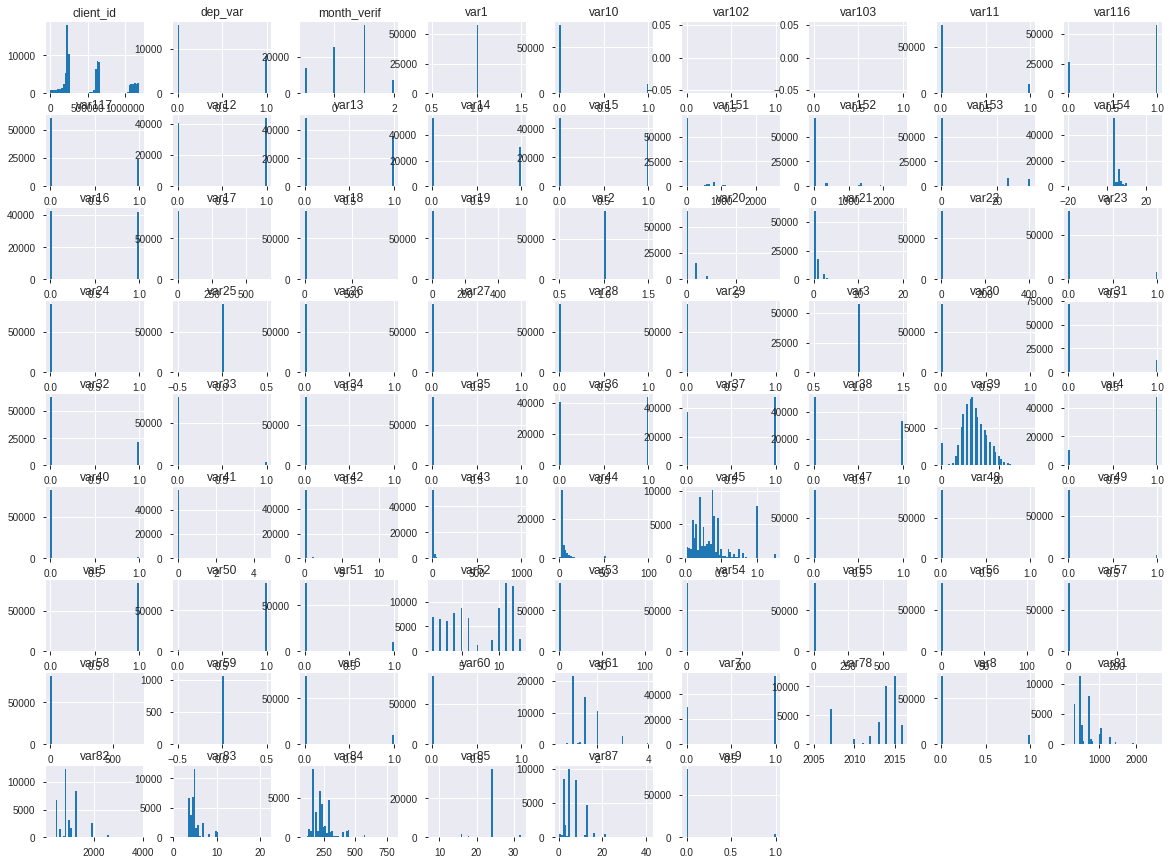

In [11]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

Most of features is binary. Numerical have distribution differ from normal. One feature has only one unique value and var 48 has lognormal distribution (we can get the log function on it in future).

In [12]:
# existence nan
(df.isnull() == True).any().value_counts()

True     99
False    62
dtype: int64

In [217]:
# number unique values in each column
for i in df.columns:
    print("Feature %s has %s unique values" %(i,len(df[i].unique())))

Feature account_id has 3 unique values
Feature client_id has 71455 unique values
Feature time_msw has 79375 unique values
Feature test_cr_decision has 2 unique values
Feature test_cr_performance has 4 unique values
Feature dep_var has 3 unique values
Feature month_verif has 4 unique values
Feature var1 has 2 unique values
Feature var2 has 1 unique values
Feature var3 has 2 unique values
Feature var4 has 3 unique values
Feature var5 has 2 unique values
Feature var6 has 2 unique values
Feature var7 has 2 unique values
Feature var8 has 2 unique values
Feature var9 has 2 unique values
Feature var10 has 2 unique values
Feature var11 has 2 unique values
Feature var12 has 2 unique values
Feature var13 has 2 unique values
Feature var14 has 2 unique values
Feature var15 has 2 unique values
Feature var16 has 2 unique values
Feature var17 has 595 unique values
Feature var18 has 623 unique values
Feature var19 has 469 unique values
Feature var20 has 9 unique values
Feature var21 has 18 unique valu

In [14]:
# delete columns with even one unique value
for i in df.columns:
    if len(df[i].unique()) == 1:
        df = df.drop(columns=[i])

In [220]:
# % nans of all size
for i in df.columns:
    count_nan = df[i].isna().sum()
    print("In column %s: %s unknown (%s perс.)" %(i,count_nan,round(count_nan/df.shape[0],2)))

In column account_id: 0 unknown (0.0 perс.)
In column client_id: 0 unknown (0.0 perс.)
In column time_msw: 0 unknown (0.0 perс.)
In column test_cr_decision: 0 unknown (0.0 perс.)
In column test_cr_performance: 60679 unknown (0.72 perс.)
In column dep_var: 60640 unknown (0.72 perс.)
In column month_verif: 0 unknown (0.0 perс.)
In column var1: 26675 unknown (0.32 perс.)
In column var2: 0 unknown (0.0 perс.)
In column var3: 26675 unknown (0.32 perс.)
In column var4: 26675 unknown (0.32 perс.)
In column var5: 0 unknown (0.0 perс.)
In column var6: 0 unknown (0.0 perс.)
In column var7: 0 unknown (0.0 perс.)
In column var8: 0 unknown (0.0 perс.)
In column var9: 0 unknown (0.0 perс.)
In column var10: 0 unknown (0.0 perс.)
In column var11: 0 unknown (0.0 perс.)
In column var12: 0 unknown (0.0 perс.)
In column var13: 0 unknown (0.0 perс.)
In column var14: 0 unknown (0.0 perс.)
In column var15: 0 unknown (0.0 perс.)
In column var16: 0 unknown (0.0 perс.)
In column var17: 0 unknown (0.0 perс.)
In 

Analysis target variable **dep_var**

In [16]:
df.dep_var.value_counts()

0.0    15177
1.0     8313
Name: dep_var, dtype: int64

count value 1 (fraud) doubled much than 0.


In [17]:
len(df[df.dep_var.isna() == False ].index),len(df[df.dep_var.isna() == True ].index)

(23490, 60640)

In general, only quarter part of data have known labels.

In [18]:
ind = df[df.dep_var.isna() == False ].index
# create df with known labels
train = df.loc[ind]

How many categorical features?

In [19]:
((df.dtypes == object) == True).value_counts()

True     83
False    74
dtype: int64

In [20]:
object_feat = []
for col in train.columns:
    if (train[col].dtypes == object):
        object_feat.append(col)

### Base models

In [21]:
X = train.drop(columns=['dep_var'])
y = train.dep_var
holdout = df.loc[df[df.dep_var.isna() == True ].index]

In [22]:
X = X.fillna(0)

In [23]:
for i in object_feat:
    X[i] = pd.factorize(X[i])[0]

In [24]:
def cv_with_scale(data,target,list_scale):
    """
    Method of cross-validation with scaling features
    Parameters
    ----------
    data : pd.DataFrame
        Training set
    target : pd.Series
        Target variable **dep_var**
    list_scale : list
        The list of features which require scaling

    Returns
    -------
    score : double
            mean of roc_auc scores on cross-validation
    """
    ss = StandardScaler()
    cv = KFold(random_state=17,n_splits=5,shuffle=True)
    cv_result = []
    for train_ind, val_ind in cv.split(data, target):
        X_train_ = data.iloc[train_ind]
        y_train_ = target.iloc[train_ind]
        X_val_ = data.iloc[val_ind]
        y_val_ = target.iloc[val_ind]
        
        for feat in list_scale:
            X_train_[feat] = ss.fit_transform(X_train_[feat].values.reshape(-1, 1))
            X_val_[feat] = ss.transform(X_val_[feat].values.reshape(-1, 1))
        
        model = LGBMClassifier(n_estimators=30,max_depth=4)
        model.fit(X_train_,y_train_)
        y_pred = model.predict_proba(X_val_)
        res = roc_auc_score(y_val_,y_pred)
        cv_result.append(res)
    return np.mean(cv_result)

In [25]:
def cv_meth(X, y, model,cv=5, scoring='roc_auc',fillna=0,transform=[]):
    """
    Method of cross-validation which is written by myself for given base score with simple 
    factorization categorical features and equel filling nan's.
    Parameters
    ----------
    X : pd.DataFrame
        Training set
    y : pd.Series
        Target variable **dep_var**
    model : metod of model
        Metod of model like LinearRegression()
    scoring : str
        The metric of score
    fillna: int, str
        The magnitude which is filling all nans
    transform: bool
        If using scaling = [list of featuresvfor scaling]
    
    Returns
    -------
    score : double
            mean scores on cross-validation
    """
    for i in object_feat:
        X[i] = pd.factorize(X[i])[0]
#     X = X.fillna(fillna)
    for col in X.columns:
        X[col] = X[col].fillna(fillna)
    if len(transform) == 0:
        cv_score = cross_val_score(model, X, y, cv=cv, scoring=scoring,n_jobs=-1) 
        cv_score = np.mean(cv_score)
    else:
        cv_score = cv_with_scale(X,y,transform)
    return cv_score

In [26]:
# create df for notices scores and data
df_scores = pd.DataFrame(columns=['model','metric','score','parameters','commit','time','variables'])

In [27]:
# Spot Check Algorithms
models = []
models.append(('LC', LogisticRegression()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('GB' ,GradientBoostingClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=17)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s roc_auc score:%f" % (name, cv_results.mean())
    df_scores = df_scores.append({'model':name,'score':cv_results.mean(), 'metric':'roc_auc',
                                  'parameters':'raw','commit':'base model from the box; determinate labels;',
                                  'time':datetime.now()}, ignore_index = True)
    print(msg)

LC roc_auc score:0.613130
AdaBoostClassifier roc_auc score:1.000000
KNN roc_auc score:0.535019
CART roc_auc score:1.000000
RandomForest roc_auc score:0.994848
GB roc_auc score:1.000000
LGBM roc_auc score:1.000000
XGB roc_auc score:1.000000


Fitting Random Forest for checking important features

In [28]:
clf = RandomForestClassifier()

In [29]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

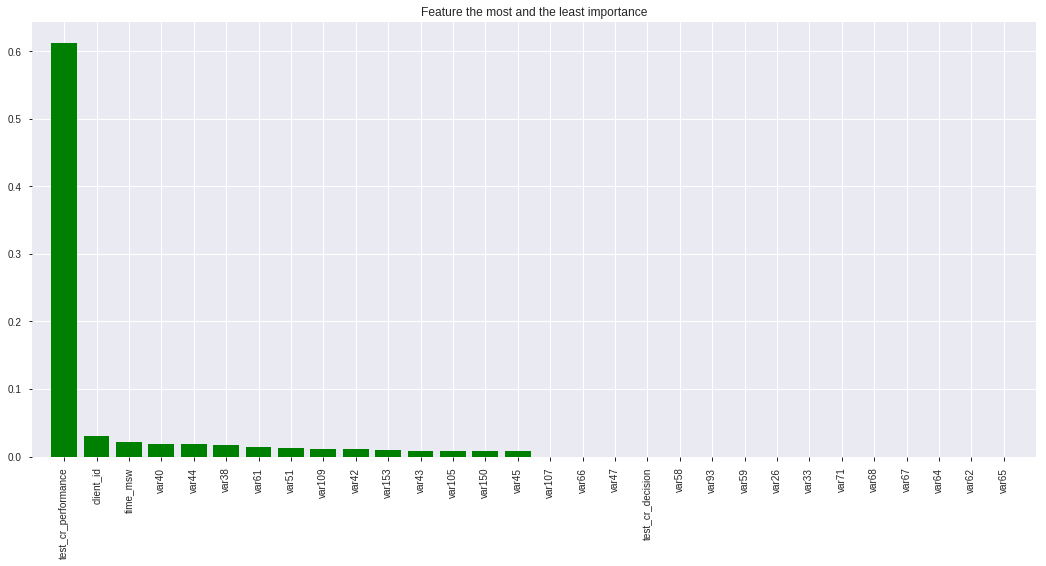

In [30]:
feat_names = df.columns
importances = clf.feature_importances_
# indices = np.argsort(importances)
indices = np.concatenate([np.argsort(importances)[::-1][:15],np.argsort(importances)[::-1][-15:]])

plt.figure(figsize=(18,8))
plt.title("Feature the most and the least importance")
plt.bar(range(len(indices)), importances[indices], color="g", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

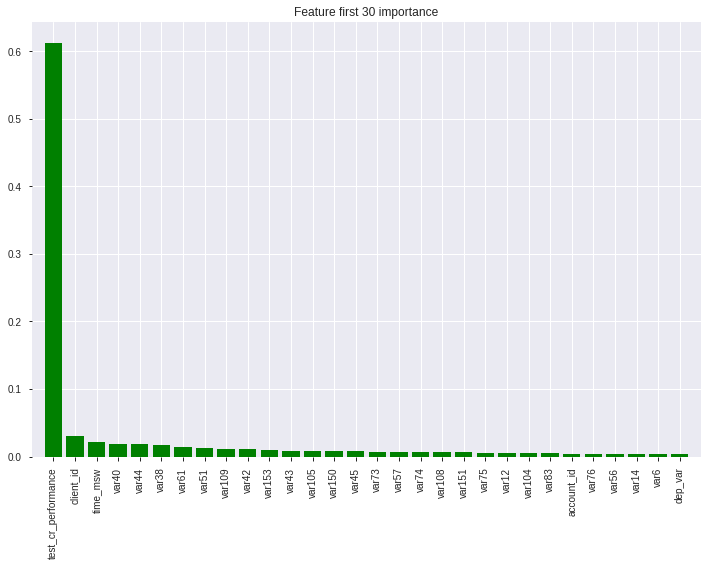

In [31]:
less_important = np.argsort(importances)[::-1][:30]
plt.figure(figsize=(12,8))
plt.title("Feature first 30 importance")
plt.bar(range(len(less_important)), importances[less_important], color="g", align="center")
plt.xticks(range(len(less_important)), feat_names[less_important], rotation='vertical')
plt.xlim([-1, len(less_important)])
plt.show()

The most important feature **test_cr_performance**

In [32]:
df.test_cr_performance.value_counts()

OK        14532
NPL90+     8313
NPL90-      606
Name: test_cr_performance, dtype: int64

In [33]:
cr_performance_feat = train.test_cr_performance.unique()

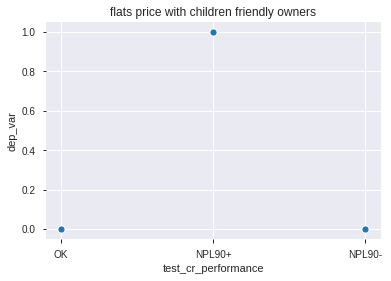

In [34]:
sns.scatterplot(x='test_cr_performance', y='dep_var', data=df);
plt.title('flats price with children friendly owners');

In [35]:
clf1 = RandomForestClassifier()
cv_score1 = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print(np.mean(cv_score1))

0.9911350594568373


In [36]:
df_scores = df_scores.append({'model':clf,'score':np.mean(cv_score1), 'metric':'roc_auc',
                              'parameters':'raw',
                              'commit':'RF for features impotance; CV 5 folds; determinate labels',
                              'time':datetime.now(),
                             'variables':'clf1,cv_score1'}, ignore_index = True)

dependency and leak search

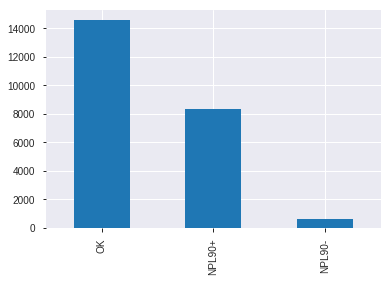

In [37]:
df['test_cr_performance'].value_counts().plot(kind='bar')

In [38]:
pd.crosstab(df['dep_var'], df['test_cr_performance'], margins=True)

test_cr_performance,NPL90+,NPL90-,OK,All
dep_var,,,,
0.0,0,606,14532,15138
1.0,8313,0,0,8313
All,8313,606,14532,23451


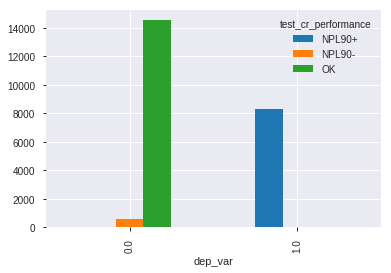

In [39]:
pd.crosstab(df['dep_var'], df['test_cr_performance']).plot(kind='bar')

In [40]:
pd.crosstab(train['dep_var'], train['test_cr_performance'], margins=True)

test_cr_performance,NPL90+,NPL90-,OK,All
dep_var,,,,
0.0,0,606,14532,15138
1.0,8313,0,0,8313
All,8313,606,14532,23451


The **test_cr_performance** duplicates the target. For objects without a target test_cr_performance is undefined.

**test_cr_decision** feature

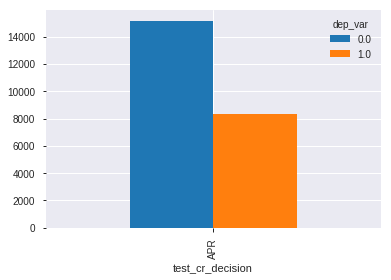

In [41]:
pd.crosstab(df['test_cr_decision'],df['dep_var']).plot(kind='bar')

In [42]:
df.test_cr_decision.value_counts()

RJC    60640
APR    23490
Name: test_cr_decision, dtype: int64

In [43]:
train.test_cr_decision.value_counts()

APR    23490
Name: test_cr_decision, dtype: int64

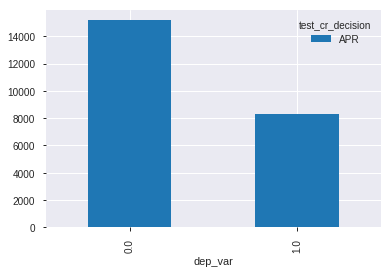

In [44]:
pd.crosstab(train['dep_var'], train['test_cr_decision']).plot(kind='bar')

In [45]:
pd.crosstab(train['dep_var'], train['test_cr_decision'], margins=True)

test_cr_decision,APR,All
dep_var,,
0.0,15177,15177
1.0,8313,8313
All,23490,23490


**test_cr_decision** feature duplicate dep_var

In [46]:
# drop test_cr_performance
train = train.drop(columns=['test_cr_performance'])

In [47]:
object_feat.remove('test_cr_performance')

In [48]:
train = train.drop(columns=['test_cr_decision'])

In [49]:
object_feat.remove('test_cr_decision')

In [50]:
train2 = train

In [51]:
cv_score8 = cv_meth(train, y, LGBMClassifier(), cv=5, scoring='roc_auc')
print('ROC-AUC:',np.mean(cv_score8))

ROC-AUC: 1.0


In [52]:
df_scores = df_scores.append({'model':LGBMClassifier,'score':np.mean(cv_score8), 'metric':'roc_auc',
                              'parameters':'raw',
                              'commit':'CV 5 folds; determinate labels; drop test_cr_performance, test_cr_decision',
                              'time':datetime.now(),
                             'variables':'train2'}, ignore_index = True)

### Metrics 

In [66]:
X = train.drop(columns=['dep_var'])



Logistic Regression

In [67]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X, y, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

Decision Tree Classifier

In [68]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X, y, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

Random Forest Classifier

In [70]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X, y, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

XGBoostClassifier

In [71]:
xgb = XGBClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgb, X, y, scoring=scoring, cv=20)

sorted(scores.keys())
xgb_fit_time = scores['fit_time'].mean()
xgb_score_time = scores['score_time'].mean()
xgb_accuracy = scores['test_accuracy'].mean()
xgb_precision = scores['test_precision_macro'].mean()
xgb_recall = scores['test_recall_macro'].mean()
xgb_f1 = scores['test_f1_weighted'].mean()
xgb_roc = scores['test_roc_auc'].mean()

LGBMClassifier

In [72]:
lgbm = LGBMClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(lgbm, X, y, scoring=scoring, cv=20)

sorted(scores.keys())
lgbm_fit_time = scores['fit_time'].mean()
lgbm_score_time = scores['score_time'].mean()
lgbm_accuracy = scores['test_accuracy'].mean()
lgbm_precision = scores['test_precision_macro'].mean()
lgbm_recall = scores['test_recall_macro'].mean()
lgbm_f1 = scores['test_f1_weighted'].mean()
lgbm_roc = scores['test_roc_auc'].mean()

In [73]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Random Forest', 'LGBM'],
    'Fitting time': [LR_fit_time, dtree_fit_time, xgb_fit_time, forest_fit_time, lgbm_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, xgb_score_time, forest_score_time, lgbm_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, xgb_accuracy, forest_accuracy, lgbm_accuracy],
    'Precision'   : [LR_precision, dtree_precision, xgb_precision, forest_precision, lgbm_precision],
    'Recall'      : [LR_recall, dtree_recall, xgb_recall, forest_recall, lgbm_recall],
    'F1_score'    : [LR_f1, dtree_f1, xgb_f1, forest_f1, lgbm_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, xgb_roc, forest_roc, lgbm_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Logistic Regression,0.950739,0.018487,0.648403,0.583366,0.512204,0.534776,0.626196
3,Random Forest,0.630567,0.039779,0.529288,0.444889,0.450313,0.500941,0.446935
1,Decision Tree,0.909747,0.013846,0.395352,0.364599,0.364550,0.395075,0.364550
4,LGBM,2.420447,0.207743,0.321961,0.285450,0.294406,0.311626,0.274423
2,XGBoost,8.037702,0.051630,0.321617,0.305752,0.282854,0.311762,0.288890


In general, the model works very bad in dirty data, but we be able to distinguish models that were better than others on some metrics.

**How to evaluate the work model?**

We must pay attention to metrics which can prevent potential fraud. If we will check the suspect client and be more careful with him, it can save money for the service provider. However, if the classifier predicts that the client can't cheat and we don't take any action, the client will cheat - this is really bad.

An important question is: “What is the ratio of the number of correctly predicted fraud to the total number of fraud?” This metric has the name “recall”.

But more often, should use roc_auc score, which contain the two dependencies: FPR and TPR.

### Hyperparameter Optimization

In [53]:
# cross-validation for choosing number of estimators LGBM metod
scores_lgbm = []
for j in range(10,201,10):
    score = cv_meth(train2.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=j),cv=kfold, scoring='roc_auc')
    scores_lgbm.append(score)

In [204]:
# graphic
trace1 = go.Scatter(
    x=[i for i in range(10,201,10)],
    y=scores_lgbm
)
data = [trace1]
layout = go.Layout(title = 'Validation curve of quantity trees selection LGBM',
          yaxis={'title':'roc-auc'}, xaxis={'title':'quantity'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

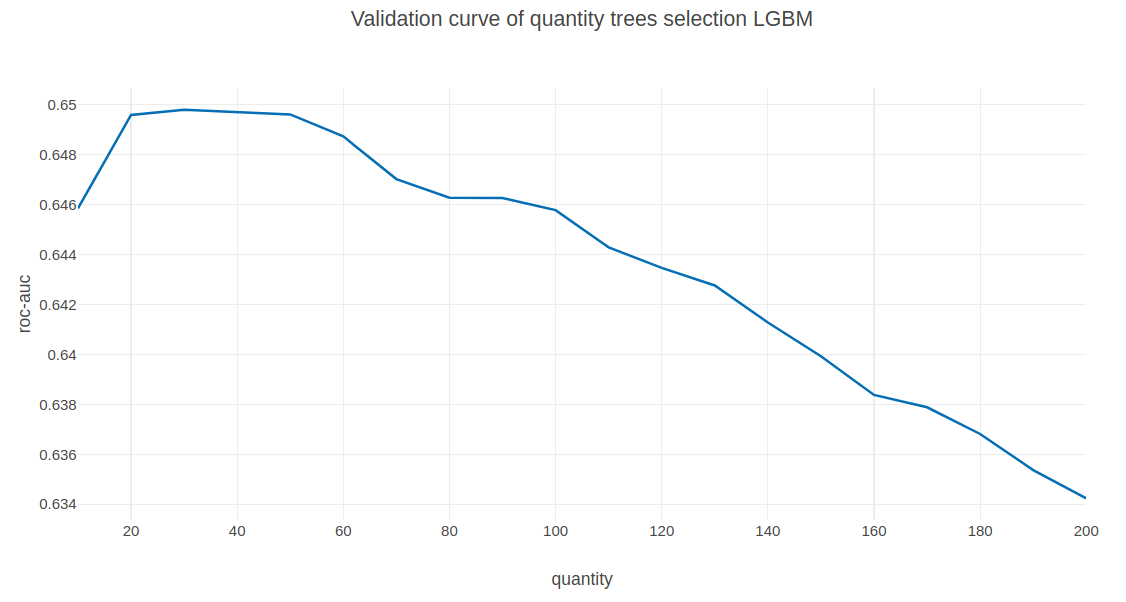

In [211]:
Image('val_curve_quant_LGBM.png')

Can conclude that using **LGBM** model from the box which number of trees is 100 will be overfitting and it cause such low score in base analysis. It works better than LogisticRegression with determinate number of trees.

In [55]:
# cross-validation for choosing max_depth LGBM metod
scores_lgbm_dep = []
for j in range(20):
    score = cv_meth(train2.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=j),cv=kfold, scoring='roc_auc')
    scores_lgbm_dep.append(score)

In [205]:
trace1 = go.Scatter(
    x=[i for i in range(20)],
    y=scores_lgbm_dep
)
data = [trace1]
layout = go.Layout(title = 'Validation curve of depth trees selection LGBM',
          yaxis={'title':'roc-auc'}, xaxis={'title':'depth'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

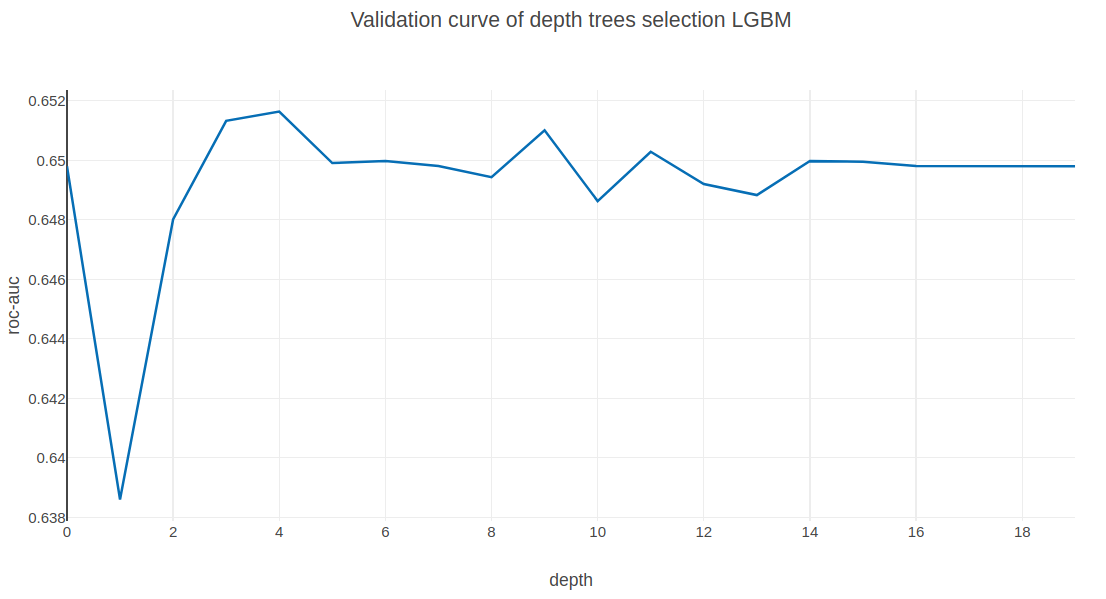

In [210]:
Image('val_curve_depth_LGBM.png')

The deepth of trees is also must be corrected in order to avoid overfitting.

In [57]:
# for comparing cross-validation for choosing number of estimators XGB metod
scores_xgb = []
for j in range(10,201,10):
    score = cv_meth(train2.drop(columns=['dep_var']),y,XGBClassifier(n_estimators=j),cv=kfold, scoring='roc_auc')
    scores_xgb.append(score)

In [206]:
trace1 = go.Scatter(
    x=[i for i in range(10,201,10)],
    y=scores_xgb
)
data = [trace1]
layout = go.Layout(title = 'Validation curve of quantity trees selection XGB',
          yaxis={'title':'roc-auc'}, xaxis={'title':'depth'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

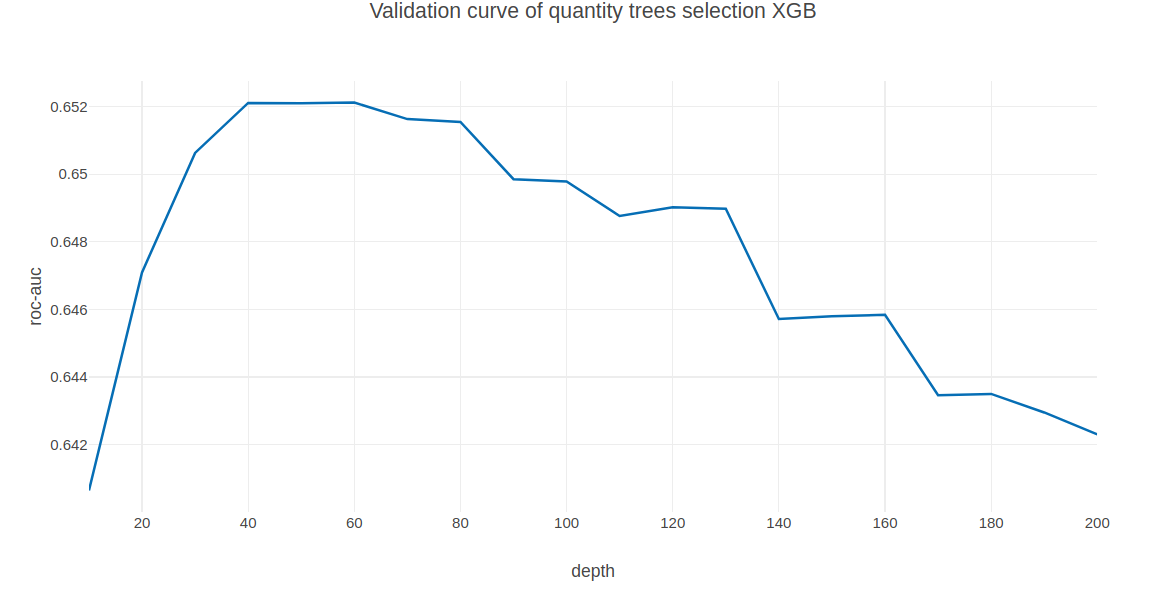

In [209]:
Image('val_curve_quant_xgb.png')

In [59]:
# cross-validation for choosing C regularization parameter
range_C = [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.7,0.9,2,5,10]
scores_lg_c = []
for j in range_C:
    score = cv_meth(train2.drop(columns=['dep_var']),y,LogisticRegression(C=j),cv=kfold, scoring='roc_auc')
    scores_lg_c.append(score)

In [207]:
trace1 = go.Scatter(
    x=range_C,
    y=scores_lg_c
)
data = [trace1]
layout = go.Layout(title = 'Validation curve of C selection LogC',
          yaxis={'title':'roc-auc'}, xaxis={'title':'C'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

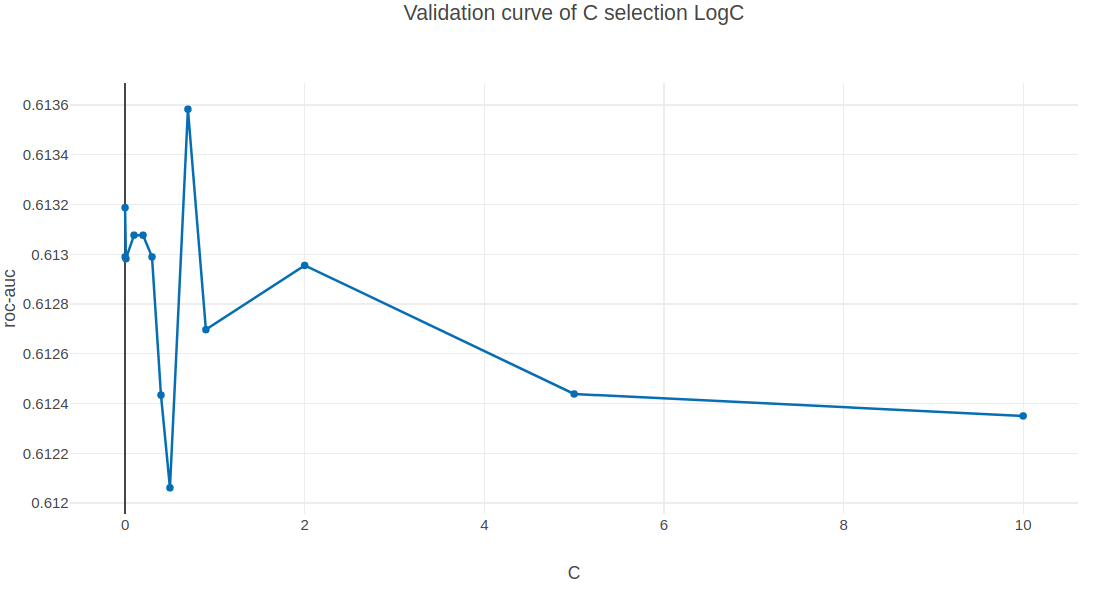

In [208]:
Image('val_curve_c_LR.png')

In [61]:
train.head()

,account_id,client_id,time_msw,dep_var,month_verif,var1,var3,var4,var5,var6,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,0,211807,0,0.0,201609,1.0,1.0,1.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,7
3,0,193611,1,0.0,201609,0.0,0.0,0.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,3
10,0,211812,2,0.0,201609,1.0,1.0,1.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,3
11,0,211814,3,0.0,201609,1.0,1.0,1.0,1,1,...,-1,-1,-1,-1,-1,-1,0,0,0,3
13,0,56232,4,0.0,201609,1.0,1.0,1.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,3


In [62]:
cv_score3 = cv_meth(train2.drop(columns=['dep_var']), y,LGBMClassifier(n_estimators=30,max_depth=4), cv=5, scoring='roc_auc')
print('roc_auc:',cv_score3)

roc_auc: 0.5385578344990868


In [63]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score3), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; drop test_cr_decision',
                              'time':datetime.now(),
                             'variables':'train2,cv_score3'}, ignore_index = True)

In [64]:
cv_score4 = cv_meth(train.drop(columns=['dep_var']), y,LogisticRegression(C=0.9), cv=7, scoring='roc_auc')
print('roc_auc:',cv_score4)

roc_auc: 0.6203912650191047


In [65]:
df_scores = df_scores.append({'model':'LogisticRegression','score':np.mean(cv_score4), 'metric':'roc_auc',
                              'parameters':'C=0.9',
                              'commit':'CV 5 folds; determinate labels; drop test_cr_decision',
                              'time':datetime.now(),
                             'variables':'train3,cv_score4'}, ignore_index = True)

Time features

In [74]:
train.head()

,account_id,client_id,time_msw,dep_var,month_verif,var1,var3,var4,var5,var6,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,0,211807,0,0.0,201609,1.0,1.0,1.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,7
3,0,193611,1,0.0,201609,0.0,0.0,0.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,3
10,0,211812,2,0.0,201609,1.0,1.0,1.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,3
11,0,211814,3,0.0,201609,1.0,1.0,1.0,1,1,...,-1,-1,-1,-1,-1,-1,0,0,0,3
13,0,56232,4,0.0,201609,1.0,1.0,1.0,1,0,...,-1,-1,-1,-1,-1,-1,0,0,0,3


Used df with known labels

In [75]:
train.time_msw = pd.to_datetime(train.time_msw)
train['start_time_s'] = train['time_msw'].apply(lambda ts: 
                                                      10000 * ts.hour + ts.minute*100 + ts.second).astype('int')
train['month_verif'] = train['time_msw'].apply(lambda ts:ts.month).astype('int')
train['hour'] = train['time_msw'].apply(lambda ts:ts.hour).astype('int')
train = train.drop(columns=['time_msw'])
train = train.drop(columns=['month_verif'])

In [76]:
object_feat.remove('time_msw')

In [77]:
cv_score5 = cv_meth(train.drop(columns=['dep_var']), y,LGBMClassifier(n_estimators=30,max_depth=4), cv=7, scoring='roc_auc')
print('roc_auc:',np.mean(cv_score5))

roc_auc: 0.5130055714056004


In [78]:
train5 = train

In [79]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score5), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features',
                              'time':datetime.now(),
                              'variables':'train5,cv_score5'},ignore_index = True)

Used feature_importances_ of LGBM to overlook weight of features

In [80]:
clf = LGBMClassifier(n_estimators=30,max_depth=4)

In [81]:
X = train.drop(columns=['dep_var'])
object_feat = []
for col in train.columns:
    if (train[col].dtypes == object):
        object_feat.append(col)
for i in object_feat:
    X[i] = pd.factorize(X[i])[0]
clf.fit(X.fillna(-1),y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=4,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=30, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [82]:
weights = pd.DataFrame(columns=['name','weight'])
weights['name'] = X.columns
weights['weight'] = clf.feature_importances_

In [83]:
weights.sort_values(by='weight',ascending=False)[:20]

,name,weight
44,var45,53
1,client_id,40
38,var39,35
73,var74,29
151,var154,26
40,var41,23
148,var151,13
42,var43,11
107,var110,11
17,var17,10


In [84]:
# used eli5
eli5.show_weights(clf, top=10,
                  feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.3179,client_id
0.1235,var45
0.0900,var152
0.0641,var74
0.0533,var39
0.0395,var109
0.0395,var41
0.0304,var154
0.0215,var13
0.0211,var151


Let's check the most important features

**var74**

In [85]:
len(train.var74.unique())

149

In [86]:
pd.crosstab(df['dep_var'], df['var74'])

var74,AG Neovo,AOL,AT&T,Acer,Adcom,Advan,Advent,Alcatel,Amazon,Apple,...,Wileyfox,Xiaomi,Yandex,Yota Devices,Yuntab,ZTE,Zifro,bq,iNew,iView
dep_var,,,,,,,,,,,,,,,,,,,,,
0.0,1,78,1,10,2,0,6,228,0,1690,...,8,84,2279,1,0,242,0,2,0,1
1.0,1,63,1,6,2,2,4,220,1,605,...,5,18,1435,0,2,243,1,4,1,1


Made 40 new binary functions for the best 40 var 74 values

In [87]:
top_var74 = train.var74.value_counts().head(40).index

In [88]:
for v in top_var74:
    train['var74_' + str(v).replace(' ','')] = train['var74'].apply(lambda x: 1 if str(v) in str(x) else 0)

In [89]:
train.head()

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var74_35,var74_17,var74_26,var74_40,var74_71,var74_28,var74_33,var74_22,var74_36,var74_48
1,0,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,193611,0.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
train = train.drop(columns=['var74'])

In [93]:
cv_score6 = cv_meth(train.drop(columns=['dep_var']),y,model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)

In [94]:
train6 = train

In [95]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score6), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features; var74; fillna=-1',
                              'time':datetime.now(),
                              'variables':'train6,cv_score6'},ignore_index = True)

In [96]:
train.head()

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var74_35,var74_17,var74_26,var74_40,var74_71,var74_28,var74_33,var74_22,var74_36,var74_48
1,0,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,193611,0.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**VAR41**

In [97]:
train.var41.head()

1     19.0
3      0.0
10    35.0
11    75.0
13    22.0
Name: var41, dtype: float64

Look at value distribution of var41

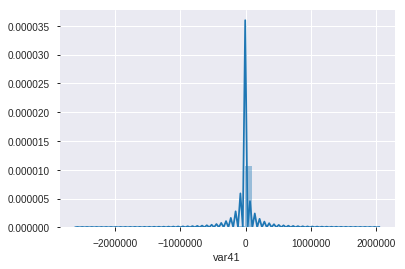

In [98]:
sns.distplot(train.var41.fillna(train.var41.sum()/train.shape[0]))

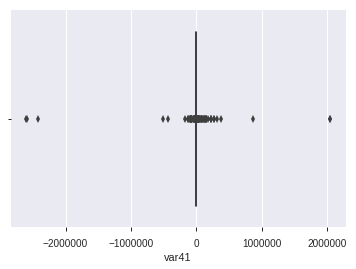

In [99]:
sns.boxplot(train.var41.fillna(train.var41.sum()/train.shape[0]))

In [100]:
ss = StandardScaler()
# train.var41 = train.var41.fillna(train.var41.median()) 
scale_var41 = ss.fit_transform(train.var41.fillna(train.var41.median()).values.reshape(-1,1))

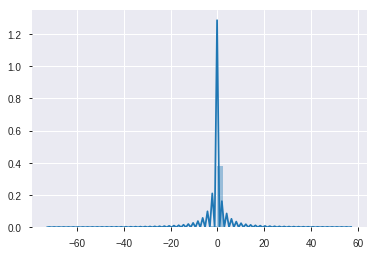

In [101]:
sns.distplot(scale_var41)

In [102]:
# overshoots
train.var41.sort_values().values[0],train.var41.sort_values().values[-1]

(-2606305.7024189997, 2045652.927521)

In [103]:
# index of overshoots
large_ind = np.concatenate( [train[(train.var41>2000000)].index,train[(train.var41<-2000000)].index])
large_ind

array([24540, 24541, 18248, 43994, 55440])

In [104]:
test_train = train.drop(index=large_ind)

In [105]:
cv_score7_2 = cv_meth(test_train.drop(columns=['dep_var']),y.drop(
    index=large_ind),model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)

cv_score7_3 = cv_meth(train.drop(
    columns=['dep_var']),y,model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)

print('LGBMClassifier with dropping large_ind; roc_auc:',cv_score7_2)
print('LGBMClassifier without dropping large_ind; roc_auc:',cv_score7_3)

LGBMClassifier with dropping large_ind; roc_auc: 0.5708584960459302
LGBMClassifier without dropping large_ind; roc_auc: 0.5697805601013511


In [115]:
cv_score8_2 = cv_meth(test_train.drop(columns=['dep_var']),y.drop(
    index=large_ind),model=LogisticRegression(C=0.9),fillna=X[col].median())

cv_score8_3 = cv_meth(train.drop(columns=['dep_var']),y,model=LogisticRegression(C=0.9),fillna=X[col].median())

print('LogisticRegression with dropping large_ind; roc_auc:',cv_score8_2)
print('LogisticRegression without dropping large_ind; roc_auc:',cv_score8_3)

LogisticRegression with dropping large_ind; roc_auc: 0.5186635660574485
LogisticRegression without dropping large_ind; roc_auc: 0.5206424831089378


Filled categorical nan by "unknown"

In [116]:
train[object_feat] = train[object_feat].fillna('unknown')

The weight of important categorical feats

In [117]:
for col in object_feat:
    print("Weight:",col,weights[weights['name'] == col]['weight'].values)

Analysis **var46**

In [118]:
train.var46.value_counts()

 0    9774
 1    6122
 2    3494
 4    3070
 3     812
 5      88
 6      80
-1      44
 7       5
 8       1
Name: var46, dtype: int64

In [119]:
train.var46.unique()

array([ 0,  1,  2,  3,  4,  5,  6, -1,  7,  8])

In [120]:
# Made new binary functions for the  var74 values
vars46 = train.var46.unique()
for v in vars46:
    train['var46_' + str(v).replace(' ','')] = train['var46'].apply(lambda x: 1 if str(v) in str(x) else 0)

In [121]:
train = train.drop(columns=['var46','var41']);

In [126]:
cv_score7 = cv_meth(train.drop(columns=['dep_var']),y,model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)

In [127]:
train7 = train

In [128]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score7), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features; var74; fillna=-1; scale var46; var41',
                              'time':datetime.now(),
                              'variables':'train7,cv_score7'},ignore_index = True)

Analysis **var119**

In [129]:
train.var119.value_counts()

-1    13727
 0     9762
 1        1
Name: var119, dtype: int64

In [130]:
df.var119.value_counts()

t    35287
f        4
Name: var119, dtype: int64

In [131]:
df.var119.value_counts()

t    35287
f        4
Name: var119, dtype: int64

In [132]:
df.var119.unique()

array(['t', nan, 'f'], dtype=object)

In [133]:
weights[(weights.name == 'var119')]['weight']

116    0
Name: weight, dtype: int64

In [134]:
# with the lowest weight feats (0)
w_0_feat = weights[weights['weight'] == 0]['name'].values
w_0_feat

array(['var1', 'var3', 'var4', 'var5', 'var8', 'var9', 'var11', 'var12',
       'var16', 'var19', 'var23', 'var24', 'var26', 'var27', 'var29',
       'var30', 'var33', 'var34', 'var35', 'var37', 'var38', 'var40',
       'var42', 'var47', 'var48', 'var49', 'var50', 'var51', 'var59',
       'var60', 'var63', 'var64', 'var65', 'var66', 'var67', 'var68',
       'var69', 'var70', 'var71', 'var72', 'var73', 'var78', 'var79',
       'var80', 'var85', 'var89', 'var90', 'var91', 'var92', 'var93',
       'var94', 'var95', 'var96', 'var97', 'var98', 'var99', 'var104',
       'var108', 'var112', 'var113', 'var115', 'var116', 'var118',
       'var119', 'var120', 'var121', 'var122', 'var123', 'var124',
       'var125', 'var126', 'var127', 'var128', 'var130', 'var131',
       'var132', 'var133', 'var134', 'var135', 'var136', 'var137',
       'var138', 'var139', 'var140', 'var141', 'var142', 'var143',
       'var144', 'var145', 'var146', 'var147', 'var148', 'var149',
       'var150', 'var153', 'start_

Look at some of w_0_feat

In [135]:
df.var1.value_counts()

1.0    57455
Name: var1, dtype: int64

In [136]:
pd.crosstab(df['dep_var'], df['var3'], margins=True)

var3,1.0,All
dep_var,,
0.0,10492,10492
1.0,6721,6721
All,17213,17213


In [137]:
train9  = train.drop(columns=w_0_feat)

In [138]:
cv_score9 = cv_meth(train9.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))

In [139]:
cv_score9

0.5613839701041122

In [140]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':cv_score9, 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features; var74; fillna=-1; scale var46; var41; drop feats with low weight',
                              'time':datetime.now(),
                              'variables':'train9,cv_score9'},ignore_index = True)

Analysis **client_id**

In [141]:
# add feature which consists number of one unique client_id activity
client_id_val = train.client_id.value_counts().to_dict()
train['client_id_num'] = train.client_id.apply(lambda x: client_id_val[x])

In [142]:
train10 = train

cv_score10 = cv_meth(train10.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))
cv_score10

0.5924129261766714

In [143]:
train.head()

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var46_1,var46_2,var46_3,var46_4,var46_5,var46_6,var46_-1,var46_7,var46_8,client_id_num
1,0,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,193611,0.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10,0,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
11,0,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,2
13,0,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3


In [144]:
pd.crosstab(df['dep_var'],df['client_id'])

client_id,311,545,715,1363,1462,2007,2895,2922,3466,3593,...,1185666,1185685,1185713,1185726,1185735,1185752,1185753,1185773,1185806,1185812
dep_var,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,2,0,1,2,0,4,...,1,0,1,1,0,1,0,0,1,1
1.0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0


(array([8.014e+03, 2.090e+02, 5.000e+01, 1.500e+01, 1.200e+01, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

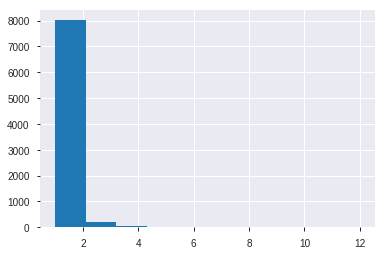

In [145]:
dis_plot_d = train[(train.dep_var == 1)]['client_id_num']
plt.hist(dis_plot_d)

The case consist hypothesis using client_id which entailed overfitting

In [146]:
# # the same before with exact condition
# train[(train['client_id_num'] > 1)].groupby(['client_id_num','dep_var'])\
#     .agg({'dep_var' : 'count'})

In [147]:
'''num_0_1_client = train.groupby(['client_id','dep_var'])['dep_var'].count().to_dict()

        client_count_0_dv = train[(train.dep_var == 0)].groupby('client_id')['dep_var'].count().to_dict()

        client_count_1_dv = train[(train.dep_var == 1)].groupby('client_id')['dep_var'].count().to_dict()

        train['client_count_1_dv'] = train.client_id.apply(
            lambda x: client_count_1_dv[x] if x in client_count_1_dv.keys() else 0)

        train['client_count_0_dv'] = train.client_id.apply(
            lambda x: client_count_0_dv[x] if x in client_count_0_dv.keys() else 0)

        train11 = train

        cv_score11 = cv_meth(train11.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))'''

"num_0_1_client = train.groupby(['client_id','dep_var'])['dep_var'].count().to_dict()\n\n        client_count_0_dv = train[(train.dep_var == 0)].groupby('client_id')['dep_var'].count().to_dict()\n\n        client_count_1_dv = train[(train.dep_var == 1)].groupby('client_id')['dep_var'].count().to_dict()\n\n        train['client_count_1_dv'] = train.client_id.apply(\n            lambda x: client_count_1_dv[x] if x in client_count_1_dv.keys() else 0)\n\n        train['client_count_0_dv'] = train.client_id.apply(\n            lambda x: client_count_0_dv[x] if x in client_count_0_dv.keys() else 0)\n\n        train11 = train\n\n        cv_score11 = cv_meth(train11.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))"

Analysis **var154**

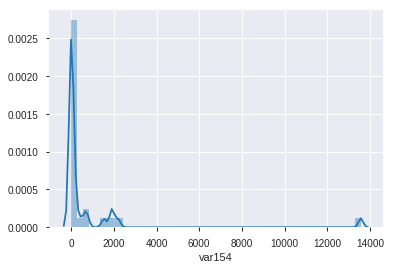

In [148]:
sns.distplot(train.var154.value_counts())

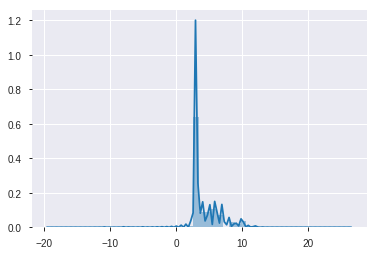

In [149]:
sns.distplot(train.var154.values)

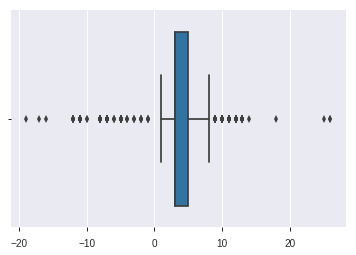

In [150]:
sns.boxplot(train.var154.values)

In [151]:
len(train.var154.unique())

31

In [152]:
train.groupby(['var154','dep_var'])\
     .agg({'dep_var' : 'count'})

dep_var
var154 dep_var         
-19    1.0            1
-17    1.0            1
-16    0.0            1
-12    0.0            4
       1.0            3
-11    0.0           13
       1.0            7
-10    1.0            2
-8     0.0           12
       1.0           10
-7     0.0           16
       1.0            7
-6     0.0            1
       1.0            2
-5     0.0           11
       1.0            3
-4     0.0            3
-3     0.0            2
       1.0            1
-2     0.0            3
       1.0            2
-1     0.0            2
       1.0            2
 1     0.0           22
       1.0           20
 2     0.0          110
       1.0           76
 3     0.0         9093
       1.0         4477
 4     0.0         1055
       1.0          868
 5     0.0         1100
       1.0          800
 6     0.0         1550
       1.0          642
 7     0.0          901
       1.0          634
 8     0.0          393
       1.0          260
 9     0.0          257
       1.0          143
 10    0.0          480
       1.0          262
 11    0.0           66
       1.0           48
 12    0.0           69
       1.0           36
 13    0.0           11
       1.0            3
 14    0.0            1
 18    1.0            1
 25    1.0            1
 26    0.0            1
       1.0            1

In genral, it is normal and doesn't need chenging

#### Make a baseline with all searched changings

In [153]:
# simple test_train_split
def tr_ts_split(data,target):
    cv = KFold(random_state=17,n_splits=5,shuffle=True)
    for train_ind, val_ind in cv.split(data, target):
        X_train_ = data.iloc[train_ind]
        y_train_ = target.iloc[train_ind]
        X_val_ = data.iloc[val_ind]
        y_val_ = target.iloc[val_ind]
    return X_train_, y_train_, X_val_, y_val_

In [154]:
def my_cross_validation(data, w_0_feat,ind=True,clf=LGBMClassifier(n_estimators=30,max_depth=4)):
    """
    Method of cross-validation which consists all base transformations dirty data
    
    Parameters
    ----------
    data : pd.DataFrame 
        All package of data
    clf : metod of classification model
        Metod of model like LGBMClassifier()
    w_0_feat : list
        The list of fetures which will dropped
    ind: bool
        If it is True divide train and test as data with and without labels
    
    Returns
    -------
    score : set(double,double)
            mean value of prediction and validation
    """
    data = data.drop(columns=['test_cr_performance','test_cr_decision'])
    data.time_msw = pd.to_datetime(data.time_msw)
    data['start_time_s'] = data['time_msw'].apply(lambda ts: 
                                                          10000 * ts.hour + ts.minute*100 + ts.second).astype('int')
    data['month_verif'] = data['time_msw'].apply(lambda ts:ts.month).astype('int')
    data['hour'] = data['time_msw'].apply(lambda ts:ts.hour).astype('int')
    data = data.drop(columns=['time_msw'])
    data = data.drop(columns=['month_verif'])
    
    for v in top_var74:
        data['var74_' + str(v).replace(' ','')] = data['var74'].apply(lambda x: 1 if str(v) in str(x) else 0)
        
    client_id_val = data.client_id.value_counts().to_dict()
    data['client_id_num'] = data.client_id.apply(lambda x: client_id_val[x])
     
    object_feat = []
    for col in data.columns:
        if (data[col].dtypes == object):
            object_feat.append(col)
    data[object_feat] = data[object_feat].fillna('unknown')
    for i in object_feat:
        data[i] = pd.factorize(data[i])[0]

        
    data = data.drop(columns=['var46']);
    data = data.drop(columns=w_0_feat);
    
    for col in data.drop(columns=['dep_var']).columns:
        data[col] = data[col].fillna(data[col].median())
    
    if ind:
        ind = data[data.dep_var.isna() == False ].index
        train = data.loc[ind]
        valid = data.drop(index=ind)
        y_train = train.dep_var
    #     не определено
        y_val = valid.dep_var.values
        X_train = train.drop(columns=['dep_var'])
        X_val = valid.drop(columns=['dep_var'])
    else:
        X_train, y_train, X_val, y_val = tr_ts_split(data.drop(columns=['dep_var']),data.dep_var)
        
    ss = StandardScaler()
    scale_train_var41 = X_train.var41.values.reshape(-1, 1)
    scale_train_var41 = ss.fit_transform(scale_train_var41)
    
    scale_val_var41 = X_val.var41.values.reshape(-1, 1)
    scale_val_var41 = ss.transform(scale_val_var41)
    
    X_train.var41 = scale_train_var41
    X_val.var41 = scale_val_var41
    
    clf = clf
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    
    return y_pred,y_val

In [155]:
# predict values for data without label
y_pred,y_val = my_cross_validation(df,w_0_feat)
train = df.loc[ind]
ind_val = df[df.dep_var.isna() == True].index
valid = df.loc[ind_val]

In [156]:
valid.shape, len(y_pred)

((60640, 157), 60640)

In [157]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [158]:
# filled data without label by predicted values
valid.dep_var = y_pred

In [159]:
valid.dep_var.isna().any()

False

In [192]:
df_full = pd.concat([train,valid])

In [161]:
# check
df_full.dep_var.isna().any()

False

(array([74045.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10085.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

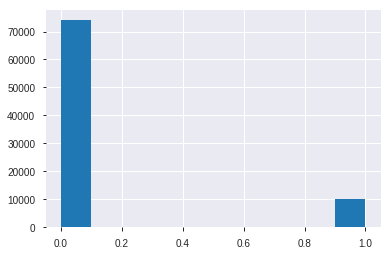

In [162]:
plt.hist(df_full.dep_var)

In [163]:
def make_pred(X,y,model):
    """
    Method of making prediction
    
    Parameters
    ----------
    X : pd.DataFrame 
        train
    y : pd.Series
        target
    model : method
        method of classification
    Returns
    -------
    score : double
            prediction
    """
    results = []
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=17)
    model.fit(X,y)
    y_pred = model.predict(X_test)
    return y_pred

In [164]:
def plot_conf_matrix(y_pred,y_test,title):
    """
    Method of plotting confusion matrix diagram
    
    Parameters
    ----------
    y_pred : pd.Series 
        prediction labels
    y_test : pd.Series
        test labels
    title : str
        The string which will written under the diagram
    """
    plt.figure()
    grad_ens_conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='')
    plt.title(title)

LogisticRegression :
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     14823
         1.0       0.39      0.14      0.21      2003

   micro avg       0.87      0.87      0.87     16826
   macro avg       0.64      0.56      0.57     16826
weighted avg       0.83      0.87      0.84     16826


LGBM :
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     14823
         1.0       0.65      0.13      0.22      2003

   micro avg       0.89      0.89      0.89     16826
   macro avg       0.77      0.56      0.58     16826
weighted avg       0.87      0.89      0.85     16826




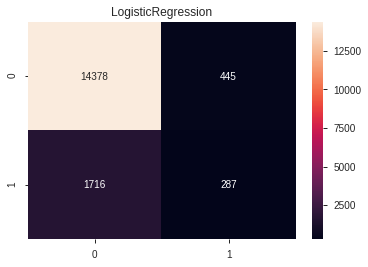

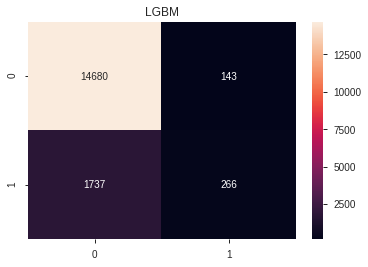

In [193]:
# Spot Check LogisticRegression and LGBMClassifier
data = df_full
outputs_model = {}
elected_models = []
elected_models.append(('LogisticRegression', LogisticRegression(C=0.6)))
elected_models.append(('LGBM',LGBMClassifier(n_estimators=30,max_depth=4)))
for name,model in elected_models:
    y_pred_,y_true_ = my_cross_validation(data,w_0_feat,False,clf=model)
    print(name,':\n {}\n'.format(classification_report(y_true_, y_pred_)))
    plot_conf_matrix(y_pred_,y_true_,name)
    outputs_model[name] = (y_pred_,y_true_)

The LGBM predicts FN less often than LR and more often is right is TP.

In [199]:
# extract FPR and TPR 
fpr_lr, tpr_lr, threshold_lr = roc_curve(
    outputs_model['LogisticRegression'][0],outputs_model['LogisticRegression'][1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
print('roc_auc LR:', roc_auc_lr)

roc_auc LR: 0.6427264581512575


In [200]:
# extract FPR and TPR 
fpr_lgbm, tpr_lgbm, threshold_lgbm = roc_curve(
    outputs_model['LGBM'][0],outputs_model['LGBM'][1])
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
print('roc_auc LR:', roc_auc_lgbm)

roc_auc LR: 0.7722808949456502


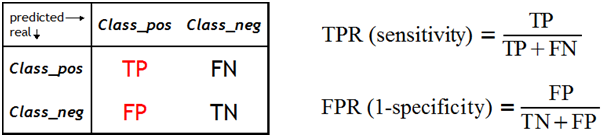

In [194]:
Image(filename='roc1_en.png')

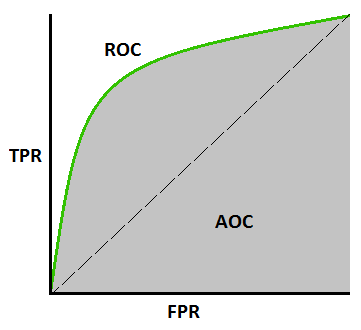

In [170]:
Image(filename='roc_auc.png')

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

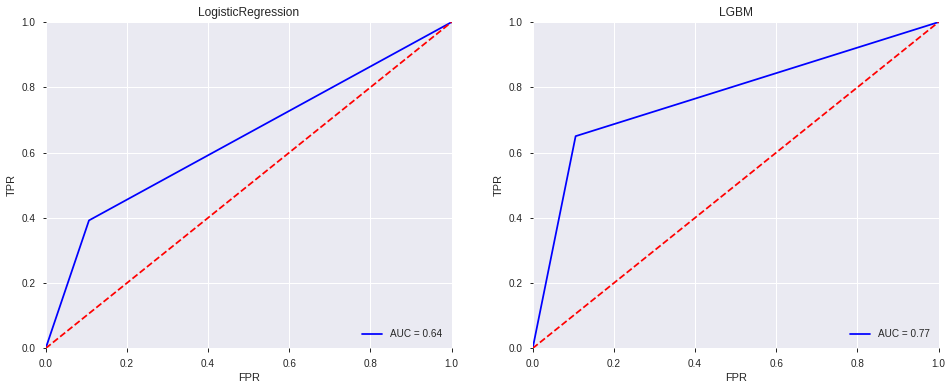

In [202]:
# plotting the own roc_auc grphic
fig, ax = plt.subplots(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('LogisticRegression')

plt.subplot(1, 2, 2)
plt.plot(fpr_lgbm, tpr_lgbm, 'b', label = 'AUC = %0.2f' % roc_auc_lgbm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('LGBM')

plt.show()

In [173]:
def train_model(data,y, w_0_feat,clf=LGBMClassifier(n_estimators=30,max_depth=4)):
    """
    Method of making fitted model from the training set (data, y)
    
    Parameters
    ----------
    data : pd.DataFrame 
        All package of data
    y : pd.Series
        Target
    clf : metod of classification model
        Metod of model like LGBMClassifier()
    w_0_feat : list
        The list of fetures which will dropped

    Returns
    -------
    self : object
        Returns self (fitting model).
    """
    data = data.drop(columns=['test_cr_performance','test_cr_decision'])
    data.time_msw = pd.to_datetime(data.time_msw)
    data['start_time_s'] = data['time_msw'].apply(lambda ts: 
                                                          10000 * ts.hour + ts.minute*100 + ts.second).astype('int')
    data['month_verif'] = data['time_msw'].apply(lambda ts:ts.month).astype('int')
    data['hour'] = data['time_msw'].apply(lambda ts:ts.hour).astype('int')
    data = data.drop(columns=['time_msw'])
    data = data.drop(columns=['month_verif'])
    
    for v in top_var74:
        data['var74_' + str(v).replace(' ','')] = data['var74'].apply(lambda x: 1 if str(v) in str(x) else 0)
        
    client_id_val = data.client_id.value_counts().to_dict()
    data['client_id_num'] = data.client_id.apply(lambda x: client_id_val[x])
     
    object_feat = []
    for col in data.columns:
        if (data[col].dtypes == object):
            object_feat.append(col)
    data[object_feat] = data[object_feat].fillna('unknown')
    for i in object_feat:
        data[i] = pd.factorize(data[i])[0]

    data = data.drop(columns=['var46']);
    data = data.drop(columns=w_0_feat);
    
    for col in data.columns:
        data[col] = data[col].fillna(data[col].median())
    
    ss = StandardScaler()
    scale_var41 = data.var41.values.reshape(-1, 1)
    scale_var41 = ss.fit_transform(scale_var41)
    
    data.var41 = scale_var41
    
    train_model = clf.fit(data,y)
                
    return train_model

### Save model

In [174]:
train_model = train_model(df.drop(columns=['dep_var']),df.dep_var,w_0_feat)

In [175]:
# Save the model as a pickle in a file 
joblib.dump(train_model, 'LGBM_model_1.pkl') 
  
# Load the model from the file 
# lgbm_from_joblib = joblib.load('LGBM_model_1.pkl')  

['LGBM_model_1.pkl']